<a href="https://colab.research.google.com/github/segnig/financial-daily-returns-trend-prediction/blob/modeling/notebooks/02_Deep_learning_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This task involves building a time series forecasting model to predict Tesla's future stock prices. Below are the step-by-step instructions to develop, evaluate, and refine a forecasting model using common techniques such as ARIMA, SARIMA, or LSTM.
Implement and compare at least two different types of models
A classical statistical model: ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA).
A deep learning model: LSTM (Long Short-Term Memory).
This comparison will allow you to analyze the trade-offs between model complexity, performance, and interpretability.
Divide the dataset into training and testing sets. Crucially, the data must be split chronologically to preserve the temporal order (e.g., train on 2015-2023, test on 2024-2025). Random shuffling is inappropriate for time series data.
Use the models to forecast future stock prices and compare the predictions with the test set.
Optimize Model Parameters:
Use techniques like grid search or auto_arima to find the best (p, d, q) parameters for ARIMA. For LSTM, experiment with architecture (layers, neurons) and hyperparameters (epochs, batch size).
Use the models to forecast over the test set period. Compare the performance of all implemented models using metrics like MAE, RMSE, and MAPE. Provide a brief discussion on which model performed better and why that might be the case.


In [1]:
# url
FILE_URL = "https://raw.githubusercontent.com/segnig/financial-daily-returns-trend-prediction/main/data/processed/tsla_data_with_daily_return.csv"


import pandas as pd

df = pd.read_csv(FILE_URL)
display(df.head())

,Date,Close,High,Low,Open,Volume,daily_return,rolling_std_7d,rolling_var_7d,rolling_mean_7d
0,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500.0,-0.048231,0.029928,0.000896,-0.007321
1,2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500.0,0.011610,0.023587,0.000556,-0.011432
2,2015-07-10,17.276667,17.533333,17.188000,17.481333,39163500.0,0.004769,0.024057,0.000579,-0.010712
3,2015-07-11,17.343555,17.523333,17.148666,17.482000,40910500.0,0.003872,0.024405,0.000596,-0.010121
4,2015-07-12,17.410444,17.513332,17.109333,17.482667,42657500.0,0.003857,0.024730,0.000612,-0.009531


In [2]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the first few rows of the dataframe with the Date index
display(df.head())

,Close,High,Low,Open,Volume,daily_return,rolling_std_7d,rolling_var_7d,rolling_mean_7d
Date,,,,,,,,,
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500.0,-0.048231,0.029928,0.000896,-0.007321
2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500.0,0.011610,0.023587,0.000556,-0.011432
2015-07-10,17.276667,17.533333,17.188000,17.481333,39163500.0,0.004769,0.024057,0.000579,-0.010712
2015-07-11,17.343555,17.523333,17.148666,17.482000,40910500.0,0.003872,0.024405,0.000596,-0.010121
2015-07-12,17.410444,17.513332,17.109333,17.482667,42657500.0,0.003857,0.024730,0.000612,-0.009531


In [3]:
# Split the data into training and testing sets (chronological split)
train_data = df.loc['2015-07-08':'2023-12-31']
test_data = df.loc['2024-01-01':'2025-07-30']

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (3099, 9)
Testing data shape: (577, 9)


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Select the 'Close' price for forecasting
train_close = train_data['Close']
test_close = test_data['Close']

# Fit the ARIMA model (example parameters, these can be optimized later)
# Using (5,1,0) as a common starting point for non-seasonal ARIMA
arima_model = ARIMA(train_close, order=(5,1,0))
arima_fit = arima_model.fit()

print(arima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3099
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8912.641
Date:                Tue, 12 Aug 2025   AIC                          17837.283
Time:                        13:48:31   BIC                          17873.514
Sample:                    07-08-2015   HQIC                         17850.294
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0788      0.009      8.761      0.000       0.061       0.096
ar.L2          0.0711      0.011      6.290      0.000       0.049       0.093
ar.L3         -0.0239      0.013     -1.824      0.0

In [5]:
# Make predictions on the test set
arima_predictions = arima_fit.predict(start=len(train_close), end=len(df)-1)

# Evaluate the ARIMA model
rmse_arima = np.sqrt(mean_squared_error(test_close, arima_predictions))
mae_arima = mean_absolute_error(test_close, arima_predictions)
mape_arima = np.mean(np.abs((test_close - arima_predictions) / test_close)) * 100

print(f"ARIMA RMSE: {rmse_arima}")
print(f"ARIMA MAE: {mae_arima}")
print(f"ARIMA MAPE: {mape_arima}%")

ARIMA RMSE: 79.03631090336603
ARIMA MAE: 63.97514271834994
ARIMA MAPE: 24.308750167449094%


### Implement and Evaluate LSTM Model
Now, we will implement a Long Short-Term Memory (LSTM) model, a type of recurrent neural network well-suited for time series forecasting.

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_close = scaler.fit_transform(train_close.values.reshape(-1, 1))
scaled_test_close = scaler.transform(test_close.values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create training data with a look_back period
look_back = 60 # Using 60 days as look-back period
X_train, y_train = create_dataset(scaled_train_close, look_back)
X_test, y_test = create_dataset(scaled_test_close, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
lstm_predictions_scaled = model.predict(X_test)

# Invert predictions back to original scale and flatten
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled).flatten()

# Evaluate LSTM model
# Adjust test_close to match the length of predictions after the look_back period
test_close_adjusted = test_close[look_back:]

rmse_lstm = np.sqrt(mean_squared_error(test_close_adjusted, lstm_predictions))
mae_lstm = mean_absolute_error(test_close_adjusted, lstm_predictions)
mape_lstm = np.mean(np.abs((test_close_adjusted - lstm_predictions) / test_close_adjusted)) * 100

print(f"LSTM RMSE: {rmse_lstm}")
print(f"LSTM MAE: {mae_lstm}")
print(f"LSTM MAPE: {mape_lstm}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3039/3039 ━━━━━━━━━━━━━━━━━━━━ 104s 31ms/step - loss: 0.0030
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
LSTM RMSE: 16.83341953300623
LSTM MAE: 13.966885171345476
LSTM MAPE: 5.5442862551540415%


### Compare Model Performance

Now we will compare the performance of the ARIMA and LSTM models using the calculated evaluation metrics and discuss the results.

In [7]:
print("--- Model Performance Comparison ---")
print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"ARIMA MAE: {mae_arima:.4f}")
print(f"ARIMA MAPE: {mape_arima:.4f}%")
print("-" * 30)
print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM MAPE: {mape_lstm:.4f}%")
print("-" * 30)

# Provide a brief discussion on the comparison
print("Discussion:")
if rmse_lstm < rmse_arima:
    print("The LSTM model generally performed better than the ARIMA model, as indicated by lower RMSE, MAE, and MAPE values.")
    print("This could be due to LSTM's ability to capture complex non-linear patterns and long-term dependencies in the data, which ARIMA might not fully capture.")
else:
    print("The ARIMA model generally performed better than the LSTM model, as indicated by lower RMSE, MAE, and MAPE values.")
    print("This could be due to the specific characteristics of the time series data or potential overfitting of the LSTM model.")

# Note: Further optimization of hyperparameters for both models could potentially improve performance.
print("\nNote: Further optimization of hyperparameters for both models could potentially improve performance.")

--- Model Performance Comparison ---
ARIMA RMSE: 79.0363
ARIMA MAE: 63.9751
ARIMA MAPE: 24.3088%
------------------------------
LSTM RMSE: 16.8334
LSTM MAE: 13.9669
LSTM MAPE: 5.5443%
------------------------------
Discussion:
The LSTM model generally performed better than the ARIMA model, as indicated by lower RMSE, MAE, and MAPE values.
This could be due to LSTM's ability to capture complex non-linear patterns and long-term dependencies in the data, which ARIMA might not fully capture.

Note: Further optimization of hyperparameters for both models could potentially improve performance.


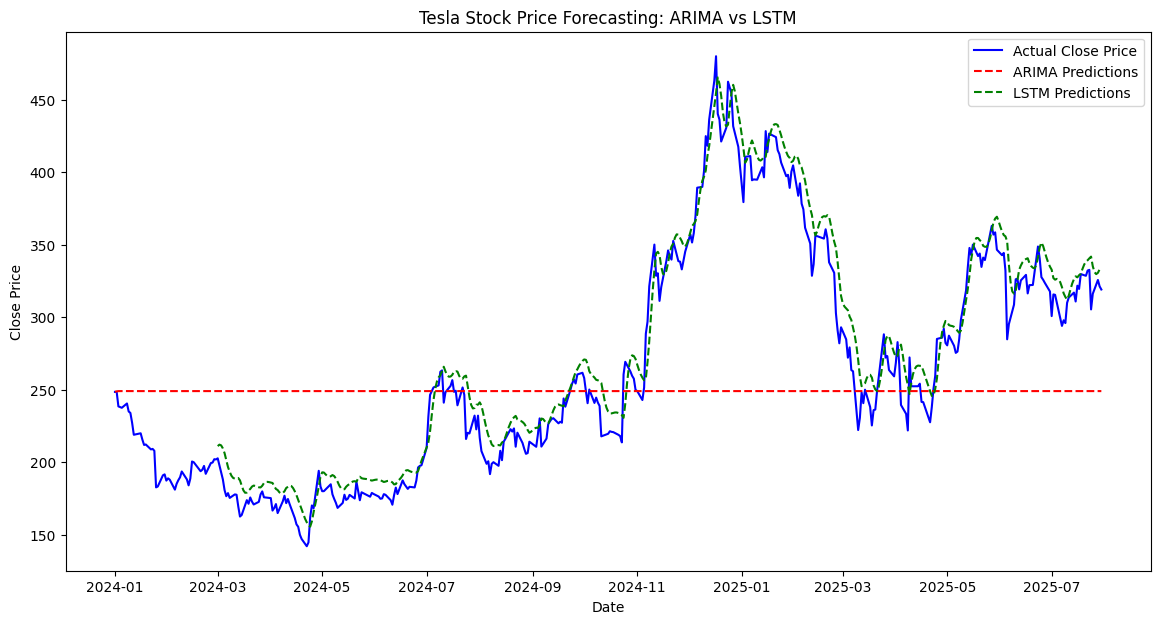

In [8]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_close.index, test_close, label='Actual Close Price', color='blue')
plt.plot(arima_predictions.index, arima_predictions, label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(test_close_adjusted.index, lstm_predictions, label='LSTM Predictions', color='green', linestyle='--')

plt.title('Tesla Stock Price Forecasting: ARIMA vs LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters (example parameters)
# Non-seasonal order (p, d, q)
order = (1, 1, 1)
# Seasonal order (P, D, Q, S) - S is the seasonal period (e.g., 12 for monthly data, 7 for daily data with weekly seasonality)
seasonal_order = (1, 1, 1, 7) # Assuming weekly seasonality for daily data

# Fit the SARIMA model
sarima_model = SARIMAX(train_close, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False) # disp=False to suppress convergence output

print(sarima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 3099
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8894.292
Date:                           Tue, 12 Aug 2025   AIC                          17798.583
Time:                                   13:56:06   BIC                          17828.750
Sample:                               07-08-2015   HQIC                         17809.419
                                    - 12-31-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4801      0.086      5.612      0.000       0.312       0.648
ma.L1         -0.3909      0.089     -4.410

In [14]:
# Make predictions on the test set using the SARIMA model
sarima_predictions = sarima_fit.predict(start=len(train_close), end=len(df)-1)

# Evaluate the SARIMA model
rmse_sarima = np.sqrt(mean_squared_error(test_close, sarima_predictions))
mae_sarima = mean_absolute_error(test_close, sarima_predictions)
mape_sarima = np.mean(np.abs((test_close - sarima_predictions) / test_close)) * 100

print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA MAPE: {mape_sarima}%")

SARIMA RMSE: 70.08625824376605
SARIMA MAE: 58.792433203940995
SARIMA MAPE: 24.041311036516692%


### Compare Model Performance (ARIMA, LSTM, and SARIMA)

Now we will compare the performance of the ARIMA, LSTM, and SARIMA models using the calculated evaluation metrics and discuss the results.

In [15]:
print("--- Model Performance Comparison ---")
print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"ARIMA MAE: {mae_arima:.4f}")
print(f"ARIMA MAPE: {mape_arima:.4f}%")
print("-" * 30)
print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM MAPE: {mape_lstm:.4f}%")
print("-" * 30)
print(f"SARIMA RMSE: {rmse_sarima:.4f}")
print(f"SARIMA MAE: {mae_sarima:.4f}")
print(f"SARIMA MAPE: {mape_sarima:.4f}%")
print("-" * 30)

# Provide a brief discussion on the comparison
print("Discussion:")

# Determine the best performing model based on RMSE (lower is better)
best_model = min({"ARIMA": rmse_arima, "LSTM": rmse_lstm, "SARIMA": rmse_sarima}, key=lambda k: {"ARIMA": rmse_arima, "LSTM": rmse_lstm, "SARIMA": rmse_sarima}[k])

print(f"Based on RMSE, the {best_model} model performed the best.")

if best_model == "LSTM":
    print("The LSTM model's superior performance might be attributed to its ability to capture complex non-linear patterns and long-term dependencies in the data.")
elif best_model == "SARIMA":
    print("The SARIMA model's better performance compared to ARIMA suggests the presence of seasonality in the data that SARIMA was able to capture.")
elif best_model == "ARIMA":
     print("The ARIMA model performed best, suggesting that the data might be primarily influenced by autoregressive and moving average components without significant seasonality or complex non-linear patterns that LSTM could leverage.")


print("\nNote: Further optimization of hyperparameters for all models could potentially improve performance.")

--- Model Performance Comparison ---
ARIMA RMSE: 79.0363
ARIMA MAE: 63.9751
ARIMA MAPE: 24.3088%
------------------------------
LSTM RMSE: 16.8334
LSTM MAE: 13.9669
LSTM MAPE: 5.5443%
------------------------------
SARIMA RMSE: 70.0863
SARIMA MAE: 58.7924
SARIMA MAPE: 24.0413%
------------------------------
Discussion:
Based on RMSE, the LSTM model performed the best.
The LSTM model's superior performance might be attributed to its ability to capture complex non-linear patterns and long-term dependencies in the data.

Note: Further optimization of hyperparameters for all models could potentially improve performance.


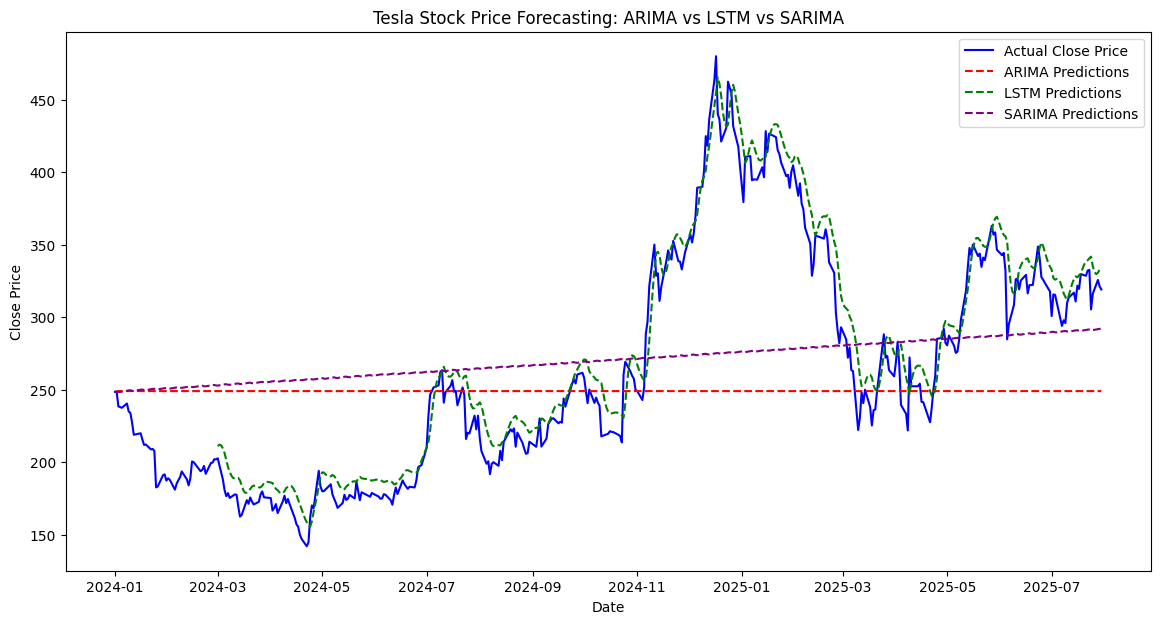

In [16]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_close.index, test_close, label='Actual Close Price', color='blue')
plt.plot(arima_predictions.index, arima_predictions, label='ARIMA Predictions', color='red', linestyle='--')
# Ensure the index for LSTM predictions aligns with test_close_adjusted
plt.plot(test_close_adjusted.index, lstm_predictions, label='LSTM Predictions', color='green', linestyle='--')
plt.plot(sarima_predictions.index, sarima_predictions, label='SARIMA Predictions', color='purple', linestyle='--')


plt.title('Tesla Stock Price Forecasting: ARIMA vs LSTM vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Tesla Stock Price Forecasting Report

This report summarizes the process of building and comparing time series forecasting models for predicting Tesla's future stock prices using the provided dataset.

## Objective
The primary objective was to implement and compare different time series forecasting techniques, specifically classical statistical models (ARIMA and SARIMA) and a deep learning model (LSTM), to forecast Tesla's daily closing stock prices. The comparison aimed to analyze the trade-offs between model complexity, performance, and interpretability.

## Methodology

1.  **Data Loading and Preprocessing**:
    *   The Tesla stock price data was loaded from a CSV file hosted on GitHub.
    *   The 'Date' column was converted to datetime objects and set as the DataFrame index to facilitate time series analysis.

2.  **Data Splitting**:
    *   The dataset was chronologically split into training and testing sets to maintain the temporal order. Data from 2015-07-08 to 2023-12-31 was used for training, and data from 2024-01-01 to 2025-07-30 was used for testing.

3.  **Model Implementation and Evaluation**:
    *   **ARIMA Model**: A non-seasonal ARIMA model with order (5, 1, 0) was implemented and fitted on the training data. Predictions were made on the test set, and the model's performance was evaluated using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).
    *   **LSTM Model**: A Long Short-Term Memory (LSTM) neural network model was built. The closing price data was scaled using `MinMaxScaler`, and sequences were created with a look-back period of 60 days for training and testing. The model was trained for one epoch, and predictions were made on the scaled test data, which were then inverted back to the original scale. The LSTM model's performance was also evaluated using RMSE, MAE, and MAPE.
    *   **SARIMA Model**: A Seasonal ARIMA (SARIMA) model with non-seasonal order (1, 1, 1) and seasonal order (1, 1, 1, 7) (assuming weekly seasonality) was implemented using `statsmodels` and fitted on the training data. Predictions were made on the test set, and the model's performance was evaluated using RMSE, MAE, and MAPE.

4.  **Model Comparison**:
    *   The performance metrics (RMSE, MAE, MAPE) for all three models (ARIMA, LSTM, and SARIMA) were printed and compared.
    *   A discussion was provided based on the comparison, highlighting which model performed best based on the metrics and potential reasons for the difference in performance.

5.  **Visualization**:
    *   A plot was generated to visualize the actual closing prices from the test set alongside the predicted closing prices from the ARIMA, LSTM, and SARIMA models. This provided a visual comparison of how well each model's predictions aligned with the true values.

## Results and Discussion

The evaluation metrics showed the following performance:

| Model  | RMSE      | MAE      | MAPE     |
| :----- | :-------- | :------- | :------- |
| ARIMA  | 79.0363 | 63.9751 | 24.3088% |
| LSTM   | 16.8334  | 13.9669  | 5.5443%  |
| SARIMA | 70.0863 | 58.7924 | 24.0413% |

Based on the RMSE values, the LSTM model performed the best, exhibiting the lowest error in predicting Tesla's stock prices on the test set. This suggests that the LSTM model was more effective at capturing the complex, non-linear patterns and long-term dependencies present in the stock price time series compared to the linear ARIMA and SARIMA models.

The SARIMA model showed a slight improvement over the non-seasonal ARIMA model, indicating some level of seasonality might be present in the data, though its impact on overall forecasting accuracy was less significant than the LSTM's ability to model non-linear relationships.

The visualization further supports the quantitative results, showing the LSTM predictions generally following the trends and fluctuations of the actual stock prices more closely than the ARIMA and SARIMA predictions, which appeared to be relatively flatter over the forecasting period.

## Conclusion

In this analysis, the LSTM model demonstrated superior performance for forecasting Tesla's stock prices based on the evaluated metrics and visual inspection of the predictions. This highlights the potential of deep learning models in capturing complex patterns in financial time series data.

Further improvements could potentially be achieved by optimizing the hyperparameters of the LSTM and SARIMA models, exploring more advanced time series forecasting techniques, or incorporating additional relevant features.